In [1]:
import os
import numpy as np
os.chdir(os.path.abspath('../')) # to gpt folder
from src.gpt_mnist.sampler import GPT_MNIST_Sampler, Pytorch_GPT_MNIST_Sampler

## GPT MNIST
We show here the variations of GPT MNIST 10 classes data

In [2]:
sa = GPT_MNIST_Sampler(compenv_mode=None, growth_mode=None)

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_sample(imgs, nx, ny, heatmap_max,heatmap_min):
    plt.figure(figsize=(ny*2,nx*2))
    for i in range(nx):
        for j in range(ny):
            img, seeds, params=next(imgs)
            config_param, g_params = params
            rotate =round(config_param['rotate'],1)
            
            plt.gcf().add_subplot(nx,ny,1+i*ny+j)
            plt.gca().imshow(img,cmap='gray',vmin=0,vmax=1.)
            plt.gca().imshow(seeds-1>0,vmin=-1.,vmax=1.,
                             cmap='bwr',alpha=0.8)
            plt.gca().set_title('%s$^{\circ}$'%(str(rotate)))
            if i==0 and j==0:
                plt.gca().set_xticks([])
            elif i+1==nx and j+1==ny:
                plt.gca().set_yticks([])
            else:  
                plt.gca().set_xticks([]); plt.gca().set_yticks([])

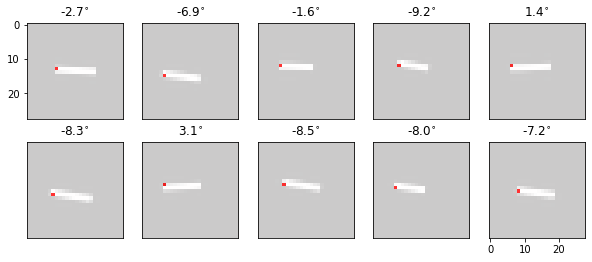

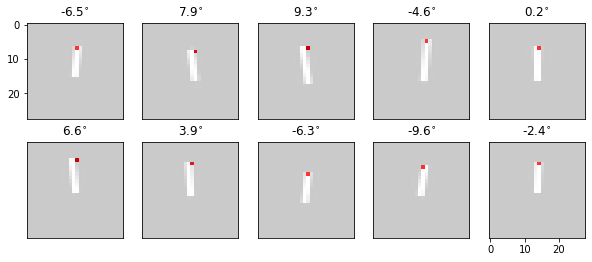

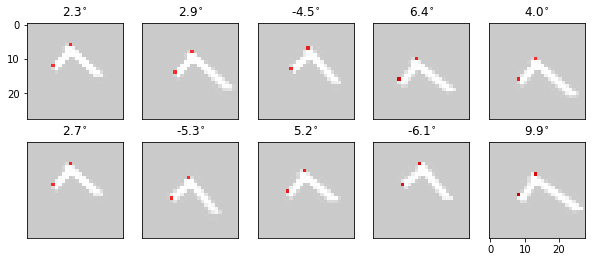

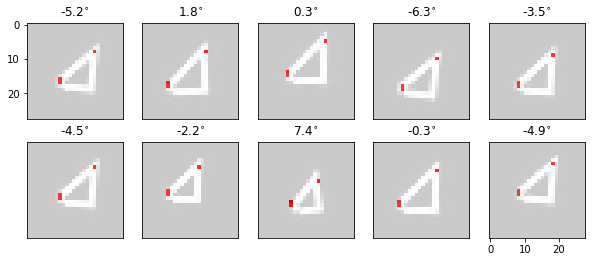

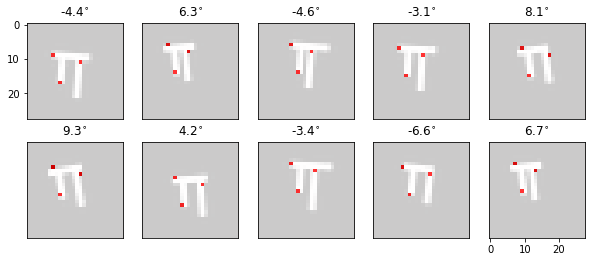

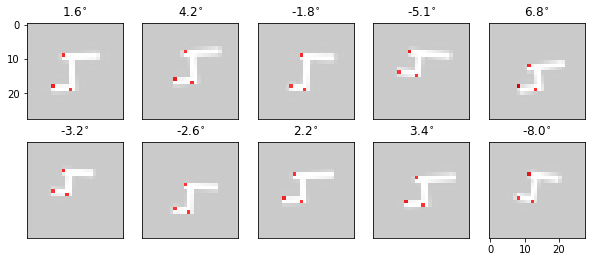

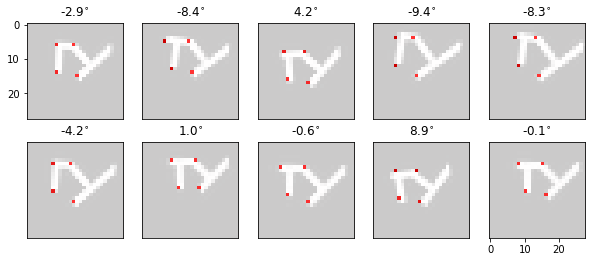

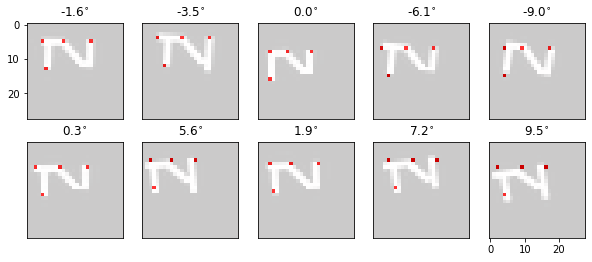

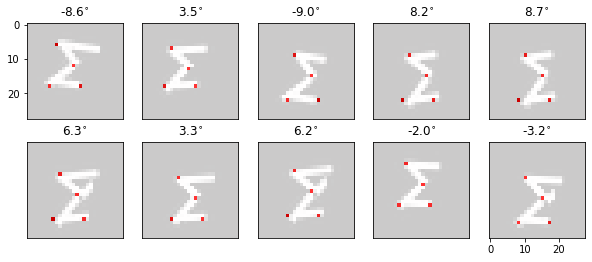

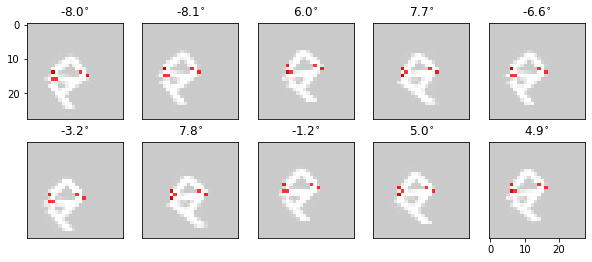

In [4]:
nx, ny = 2,5
seed_max = sa.G0.shape[0]*sa.topology_matrix.shape[0]
for c in range(10):
    imgs = []
    for i in range(nx*ny):
        img, seeds, params = sa.get_one_sample(c=c)
        imgs.append((img, seeds, params))
    show_sample(iter(imgs), nx, ny, heatmap_max=seed_max,heatmap_min=-seed_max)


# Pytorch data sampler
This show the use pytorch API as the sampler.

In [5]:
sa = Pytorch_GPT_MNIST_Sampler(compenv_mode=None, growth_mode=None)
img_batch,y_batch,yg_batch, ys_batch = sa.get_sample_batch_uniform_random(batch_size=16)
print(img_batch.shape, y_batch.shape, yg_batch.shape, ys_batch.shape)

torch.Size([16, 1, 28, 28]) torch.Size([16]) torch.Size([16, 28, 28]) torch.Size([16, 28, 28])
